# Importing Requried libraries :-

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Loading Datasets :-

In [12]:
df = pd.read_csv("insurance_data.csv")
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


<Axes: >

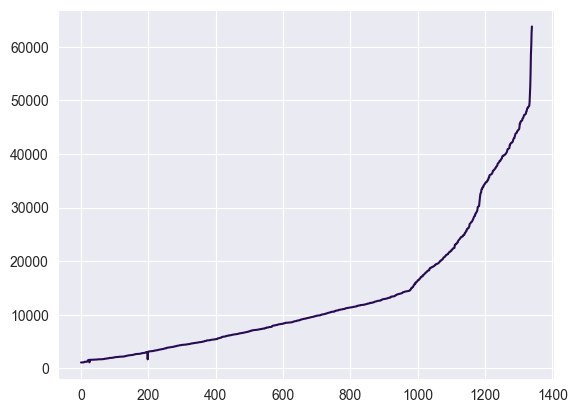

In [13]:
df['claim'].plot(kind='line')

# About Dataset :-
# **Column name & Descriptions**

- **Index** : Indexes
- **PateintID** : Unique Id For Each And Every Person
- **age** : Age Of The Person
- **gender** : Gender (Male or Female)
- **bmi** : Bmi Value For Each Person, BMI Stands For **Body Mass Index.**
- **bloodpresurre** : Blood pressure Value For Each Person
- **Diabetic** : Whether the insured person is diabetic or not. (Boolean)
- **Children** : Number of children of the insured person. (Integer)
- **Smoker** : Whether the insured person is a smoker or not. (Boolean)
- **region** : There are Four Region ('southeast','northwest','southwest','northeast')
- **Claim** : Amount of the insurance claim. (Float)


# Basic Information Of Dataset :-

In [14]:
df.shape

(1340, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1340.0,669.500000,386.968991,0.00,334.750,669.500,1004.250,1339.00
PatientID,1340.0,670.500000,386.968991,1.00,335.750,670.500,1005.250,1340.00
age,1335.0,38.078652,11.102924,18.00,29.000,38.000,47.000,60.00
bmi,1340.0,30.668955,6.106735,16.00,26.275,30.400,34.700,53.10
bloodpressure,1340.0,94.157463,11.434712,80.00,86.000,92.000,99.000,140.00
children,1340.0,1.093284,1.205334,0.00,0.000,1.000,2.000,5.00
claim,1340.0,13252.745642,12109.609288,1121.87,4719.685,9369.615,16604.305,63770.43


In [17]:
df.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

# Detection Of Missing Values :-

In [18]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

- There are Few Missing Values in Two Columns : **(Age and Region)**

# Filling The value Of "Age" Column AND Droped the Missing Value Of "Region" Columns

In [19]:
temp_df=df[df["gender"]=="male"]
df["age"]=df["age"].fillna(round(temp_df["age"].mean()))

- Filling Missing Values In Age Column With **Mean(Age)**.

In [20]:
df['region']=df['region'].fillna(df['region'].mode()[0])

- Filling The Missing Value Of **region** Column with the Most frequent region.

In [21]:
df["age"]=df["age"].astype(int)

- Correcting **Age** Datatype From **Float** to **Int**.

In [22]:
df.set_index('index',inplace = True)

In [23]:
df.shape

(1340, 10)

- There are **1337 Rows** And **10 Columns** Present In Whole Datasets.

# Checking Duplicated Data

In [24]:
df.duplicated().sum()

0

- There is **No Duplicate's** present in Dataset.

# **Univarate Analysis**

# Gender-Wise And Age Distribution of Patients :-

In [25]:
sns.set_palette('inferno')
gender = df["gender"].value_counts().reset_index()
gender

,gender,count
0,male,678
1,female,662


KeyError: 'index'

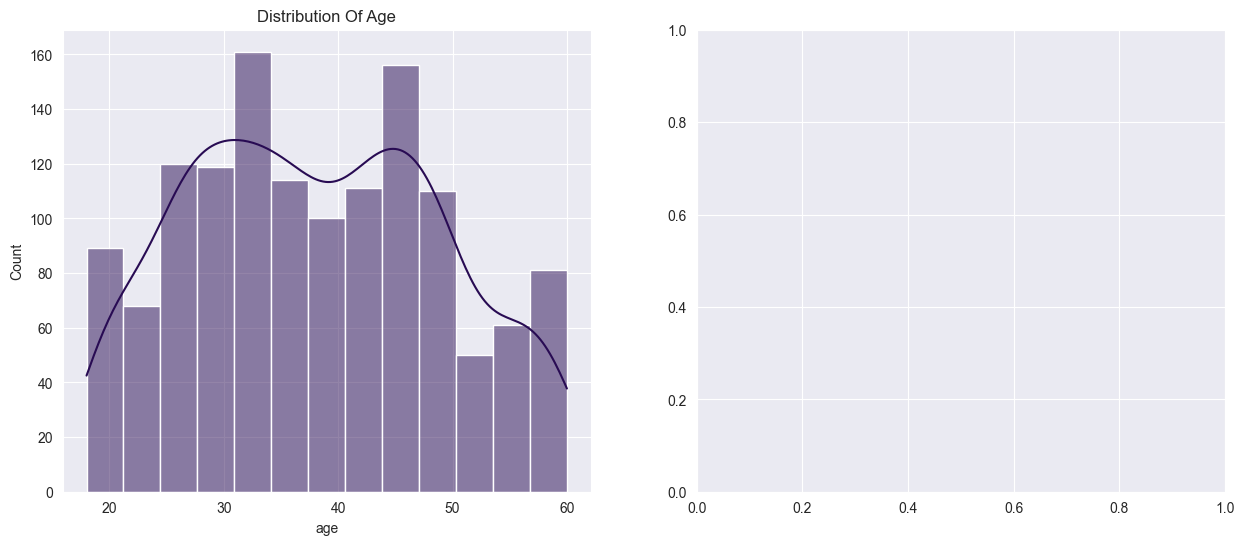

In [33]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df["age"],kde=True)
plt.title("Distribution Of Age")
plt.subplot(1,2,2)
sns.barplot(x=df['index'],y=gender['gender'],data=gender,edgecolor='black')
plt.title("Gender")
plt.show()

- **CHART-1:** Distribution Of Age Indicate's That **Most Insurance Claimed** By Those Patients Whose Age Lie Between **30 to 50 years.**
- **CHART-2:** Shows There Are **Almost Equal Distribution** of **Male** & **Female** in Terms Of Insurance Claims (**675** & **662** Respectively).

# Distribution Of BMI And Distribution Of Blood Pressure :-

C:\Users\Omer Habib\AppData\Local\Temp\ipykernel_21516\1389624257.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"],color="blue")


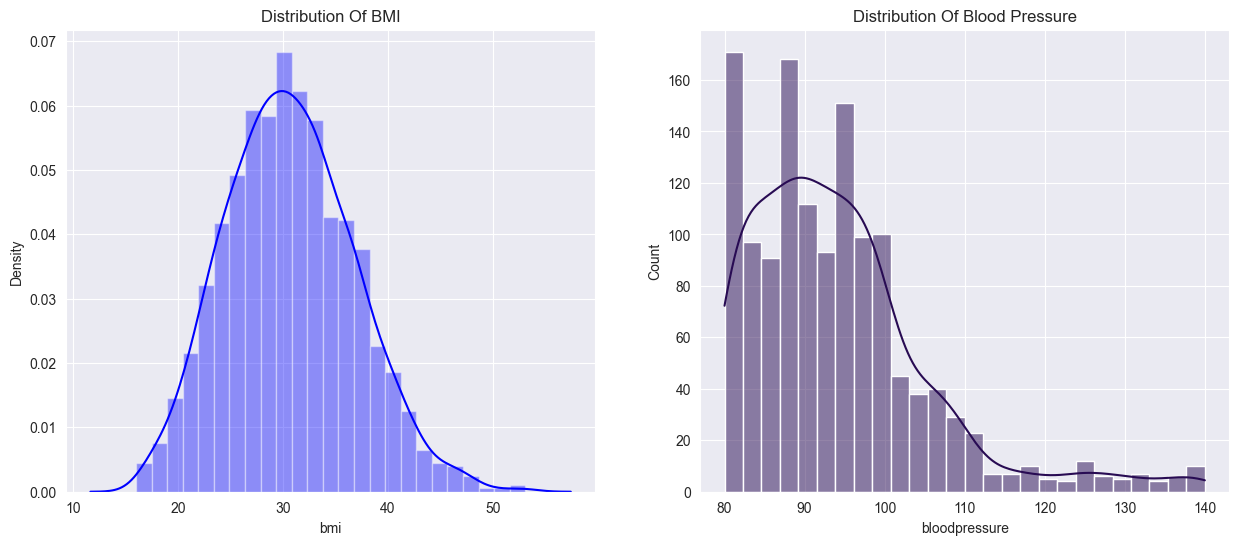

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["bmi"],color="blue")
plt.title("Distribution Of BMI")
plt.subplot(1,2,2)
sns.histplot(df["bloodpressure"],kde=True)
plt.title("Distribution Of Blood Pressure")
plt.show()

- **CHART-1:** Indicate's The **Normal Distribution of BMI** Of Patient's Data
- **CHART-2:** Indicate's That Majority Of Patients Has **Normal Blood Pressure** Between **80 to 110.**

# Frequency Of Diabetic Patient  :-

In [29]:
dia=df["diabetic"].value_counts().reset_index()
dia

,diabetic,count
0,No,698
1,Yes,642


# Frequency No. Of Children 

In [30]:
children = df['children'].value_counts()
children

children
0    576
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [31]:

fig = px.bar(dia, x=dia.index, y='diabetic', title='Frequency of Diabetic And Non-Diabetic Person')
fig.show()

fig = px.bar(x=children.index, y=children.values, title='Frequency Of Person With Their No. Childs')
fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['diabetic', 'count'] but received: index
 To use the index, pass it in directly as `df.index`.

- **CHART-1:** Frequency Of **Non-diabetic** Patient are More than **Diabetic** Patients **(697 & 640,Respectively).**
- **CHART-2:** Paitent's With **0 Child** Claimed More Insurance As Compared to Other Patient's.

# Distribution Of Smoker And Non-Smoker Patient

In [ ]:
smoker= df["smoker"].value_counts()
smoker

 # Distribution of Region

In [ ]:
region = df['region'].value_counts()
region

In [ ]:
import plotly.express as px

fig = px.pie(df, names='smoker', title='Distribution of Smoker & Non-Smoker with Most No. of Claims')
fig.show()

fig = px.pie(df, names='region', title='Distribution of Region with Most No. of Claims')
fig.show()


- **CHART-1:** The **Massive No. Of Insurance Claimed** By **Non-Smoker Pateint's** As Compared To **Smoker Pateints** As Shown Figure-1.
- **CHART-2:** **Pateints Of Southeast** Claimed **Maximum** No. Of Insurance As Compared To Other Regions.

# Claim Amount Distribution

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df['claim'],kde=True)
plt.title('Distribution of Claims')
plt.grid()
plt.show()

- **The Pateint With Lower Claim's is More As Compared Pateint With Higher Claim's.**
- Which Means Insurance Claims Amount Between **30000 to 150000** Claimed Most Of The Patients On Other-Hand Frequency of Pateints With Higher Claims Are Very Less.

# **Featue Enginiering** 

## Fetching New BP_Category Column From Existing bloodpressure Column.

In [ ]:
def bp_level(value):
    if value <= 120:
        return 'Normal BP'
    elif value >= 120 and value <=129:
        return 'At Risk'
    else:
        return 'High BP'


In [ ]:
df["BP_category"]=df['bloodpressure'].apply(lambda x : bp_level(x))

- Created a **Categorical Column**For **Blood Pressure Values**
- Converted Values Into Categories As :
    - Value <= 120 To **'Normal BP'**
    - Value >= 120 And Value <=129 To **'At Risk'**
    - Value >129 To **'High Bp'**

In [ ]:
def bmi_cat(value):
    if value <= 18.5:
        return 'Under-weight'
    elif value > 18.5 and value <=24.9:
        return 'Healthy-weight'
    elif value > 25.0 and value <=29.9:
        return 'Over-weight'
    else:
        return 'Obesity'

In [ ]:
df['bmi_category']=df["bmi"].apply(bmi_cat)

- Created a **Categorical Column**For **BMI Values**
- Converted Values Into Categories As :
    - Value <= 18.5 To **'Undeer-weight'**
    - Value >= 18.5 And Value <=24.9 To **'Healthy-weight'**
    - Value >25.0 And Value<=29.9 To **'Over-weight'**
    - Value > 29.9 To 'Obesity'

# Heatmap

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


# Pairplot

In [ ]:
import plotly.figure_factory as ff

fig = ff.create_scatterplotmatrix(df, diag='histogram', index='PatientID', colormap='Viridis', height=1200, width=1800)
fig.update_layout(title='Pairplot of Variables')
fig.show()


## Age Vs Claim Amount (sum)

In [ ]:
age_group = df.groupby('age').sum()
fig = go.Figure(data=go.Scatter(x=age_group.index, y=age_group['claim'],mode='lines+markers'))
fig.update_layout(title='Claims over time',xaxis_title='Age',yaxis_title='Claims')
fig.show()

In [ ]:
df.head()

# What is The Average Insurance Claimed By People Of Different Age ?

In [ ]:

fig = px.bar(df, x='age', y='claim', text='claim',title='Average Insurance Claimed By Different Age')
fig.show()


- This Chart Indicates Pateint's Of Diffrent Age Groups Who Claimed Insurances. 
- As Chart Show's That **30-Year Pateints** Claimed **Highest Average Insurance's** and Pateint with **Age-43 Comes Afterwards**.

#  What is The Average Insurance Claimed By Gender ?

In [ ]:
df.groupby(['gender'])['claim'].agg(['mean']).round().sort_values(by='mean',ascending=False)

In [ ]:

fig = px.bar(df, x='gender', y='claim', text='claim',title='Average Insurance Claimed By Gender')
fig.show()


- **Insights :-** According To Chart, Male Pateints Usually Have Higher Average Claimed Amount As Compared To Female Pateints.
- Average Claimed Amount For **Male** is - *13976 (Approx.)*
- Average Claimed Amount For **Female** is - *12570 (Approx.)*

#  What is The Average Insurance Claimed By People Categorized With Different Range of BMI?

In [ ]:

fig = px.bar(df, x='bmi_category', y='claim',text='claim', title='Average Insurance Claimed By Diff. Category Of BMI')
fig.show()


- **Obesity:-** Pateint's With **BMI(Body Mass Index)** Greater Than **30** are Referred as Obesity.
- Pateint Who Fall's In **Obesity Category** Claimed **Higher Average Insurance** As Compared To Other Such As **Under-weight or Over-weight**,Etc.

#  What is The Average Insurance Claimed By People Categorized With Different Range of Blood Pressure?

In [ ]:

fig = px.bar(df, x='BP_category', y='claim',text='claim', title='Average Insurance Claimed By Diff. Category Of Blood Pressure')
fig.show()


- Created a **Categorical Column** For **Blood Pressure Values**
- Converted Values Into Categories As :
    - Value <= 120 To **'Normal BP'**
    - Value >= 120 And Value <=129 To **'At Risk'**
    - Value >129 To **'High Bp'** 
- Pateint Who Fall's In **At Risk Category** & **High BP Category** Claimed **Higher Average Insurance** As Compared To **Normal BP**.

# What is Average Insurance Claimed By Daibetic And Non-Diabetic Person ?

In [ ]:

fig = px.bar(df, x='diabetic', y='claim', text='claim',title='Average Insurance Claimed By Diabetic & Non-Diabetic Person')
fig.show()


- There is **No Variation** in **Average Insurance** Claimed Bu **Diabetic** And **Non-Diabetic** Pateint's.
- **Average Insurance** Claimed By **Diabetic** Or **Non-Diabetic** Pateint's Are Almost Equal.

# What is Relation Of Average Insurance Claimed And Person With Their No. Of Children?

In [ ]:

fig = px.bar(df, x='children', y='claim', text='claim', title='Average Insurance Claimed By people With No. Of Childs')
fig.show()


# What is Average Insurance Claimed By Smoker And Non-Smoker Person ?

In [ ]:

fig = px.bar(df, x='smoker', y='claim', text='claim', title='Average Insurance Claimed By Smoker & Non-Smoker Person')
fig.show()


- There is **Massive Variation** In Average Insurance Claimed By **Smoker And Non-Smoker Pateint's**.
- As Graph Indicates **Pateints Who Smoke Claim's Higher Insurance Amount** As Compared To **Non-Smoker Pateints**.

# What is Average Insurance Claimed By Regions ?

In [ ]:

fig = px.bar(df, x='region', y='claim', text='claim', title='Average Insurance Claimed By Different Regions')
fig.show()


- The Figure Represent's The Average Insurance Claimed By The Diffirent Region Such as :
    - Southeast
    - Northwest
    - Southwest
    - Northeast
- People From **Northeast** Claimed High Average Insurance AS Compared To Pateint's From Other Regions. 

# **Multi-Variate Analysis**

# What is the Average Insurance Claimed As Compared To Male-Smoker Or Female-Smoker And 
# What is the Average Insurance Claimed As Compared To Male-Diabetic Or Female-Diabetic ?

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(x='gender',y='claim',hue="smoker",data=df,edgecolor='black')
plt.title("Average Claim As Compared To Male Smoker Or Female Smoker")


plt.subplot(1,2,2)
sns.barplot(x='gender',y='claim',hue="diabetic",data=df,edgecolor='black')
plt.title("Average Claim As Compared To Male Diabetic Or Female Diabetic")
plt.show()

- **CHART - 1**: Show's Average Insurance Claimed By Male Smoker and Non-Smoker And Female Smoker And Non-Smoker.
    - The Graph Clearly Indicate's That **Male Smoker** And **Female Smoker** Claimed High Insurance Amount as Compared To **Non-Smoker Male And Female Pateints**.
- **CHART - 2**: Show's Average Insurance Claimed By Male Diabetic Pateints or Non-Diabetic Pateints And Female Diabetic Pateints or Non-Diabetic Pateints.
    - The Graph Indicate's That Claims Of **Non-Diabetic Males** Are Slightly Higher Than to **Diabetic Males**.
    - And **Diabetic Females** And **Non-Diabetic Females** Are Claimed **Equally** For Insurance.

# What Is The Relation Of Average Claim as Compared to Region,Gender,BP_Category ? 

In [ ]:
# Region, Gender vs Claim
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(x='region',y='claim',hue="gender",data=df,edgecolor='black')
plt.title("Average Claim With Region And gender")
plt.subplot(1,2,2)
sns.barplot(x='region',y='claim',hue="BP_category",data=df,edgecolor='black')
plt.title("Average Claim With Region And BP_Category")
plt.show()

# Determine The Relations of BP_category And BMI_category With Gender And Average Claim's ?

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(x='BP_category',y='claim',hue="gender",data=df,edgecolor='black')
plt.title("Relationship of BP_category With Gender And Average Claim")
plt.subplot(1,2,2)
sns.barplot(x='bmi_category',y='claim',hue="gender",data=df,edgecolor='black')
plt.title("Relationship of BMI_category With Gender And Average Claim")
plt.show()

- **CHART-1:** Indicate's Relationship Of Blood Pressure Categories With Gender as well as Average Claim by Pateints.
    - As We Can See That Both Male ANd Female Pateint's With High BP And Pateint's Who fall's In At Risk Category,
    - And Claimed Higher Average Insurance As Compared To Normal BP Pateints.
- **CHART-2:** Indicate's Relationship Of BMI Categories With Gender as well as Average Claim by Pateints.
    - Obesity Male And Female Pateints Claimed Higher Average Insurance As Compared To Other BMI Categories.
    - Under-weight Female Pateints Claimed Higher Amount as Compared to Under-weight Male Pateints

# Insights

- **Age:** Distribution Of Age Indicate's That **Most Insurance Claimed** By Those Patients Whose Age Lie Between **30 to 50 years.**

- **Gender:** Shows There Are **Almost Equal Distribution** of **Male** & **Female** in Terms Of Insurance Claims (**675** & **662** Respectively). And Male Pateint's Claimed **Higher Average Insurance** As Compared to Female Pateint's.

- **BMI :** Indicate's The **Normal Distribution of BMI** Of Patient's Data
- **Blood Pressure :** Indicate's That Majority Of Patients Has **Normal Blood  Pressure** Between **80 to 110.**

- **Region :** Shows That **Southeast Region** Has **Highest Number of Insurance Claims** Compared To Other Region's

- **Smoker :** Shows That **Non-Smoker** Has **Higher Number of Insurance Claims** Compared To **Smoker**

- **Children :** Shows That **Majority of Patients** Has **No Children**

- **Insurance Claim :** Shows That **Most Insurance Claims** Are **Accepted** Compared To **Rejected** Claims

- **Insurance Claim Amount :** Shows That **Most Insurance Claims** Are **Less than 15,000**

- **Diabetic :** Shows That **Majority of Patients** Are **Non-Diabetic**

- **Smoker :** Shows That **Majority of Patients** Are **Non-Smoker**

- **The Pateint With Lower Claim's is More As Compared Pateint With Higher Claim's.**. Which Means Insurance Claim Amount  **Less than 15000** is Claimed by Most Of The Patients On Other-Hand Frequency of Pateints With Higher Claims Are Very Less.

- Both Male ANd Female Pateint's With High BP And Pateint's Who fall's In At Risk Category. And Claimed Higher Average Insurance As Compared To Normal BP Pateints.

-  Obesity Male And Female Pateints Claimed Higher Average Insurance As Compared To Other BMI Categories.
- Under-weight Female Pateints Claimed Higher Amount as Compared to Under-weight Male Pateints

- Both Male and Female Patients from northeast region claimed higher average insurance as compared to other regions.

- **Male Smoker** And **Female Smoker** Claimed High Insurance Amount as Compared To **Non-Smoker Male And Female Pateints**.
- Claims Of **Non-Diabetic Males** Are Slightly Higher Than to **Diabetic Males**. And **Diabetic Females** And **Non-Diabetic Females** Are Claimed **Equally** For Insurance.
